In [2]:
import torch
import sys
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
sys.path.append('../data_retrieval/')
from data import base_dataset
import json
from torchvision.datasets import ImageFolder

In [7]:
data = ImageFolder('../data_retrieval/data_full')


In [20]:
len(data)

22352

In [11]:
idx_to_class = {v: k for k, v in data.class_to_idx.items()}

In [12]:
from collections import Counter
labels_count = Counter()
for image, label in data:
    labels_count[idx_to_class[label]] += 1

In [24]:
sorted_labels_count = dict(sorted(labels_count.items(), key=lambda x:x[1],reverse=True))

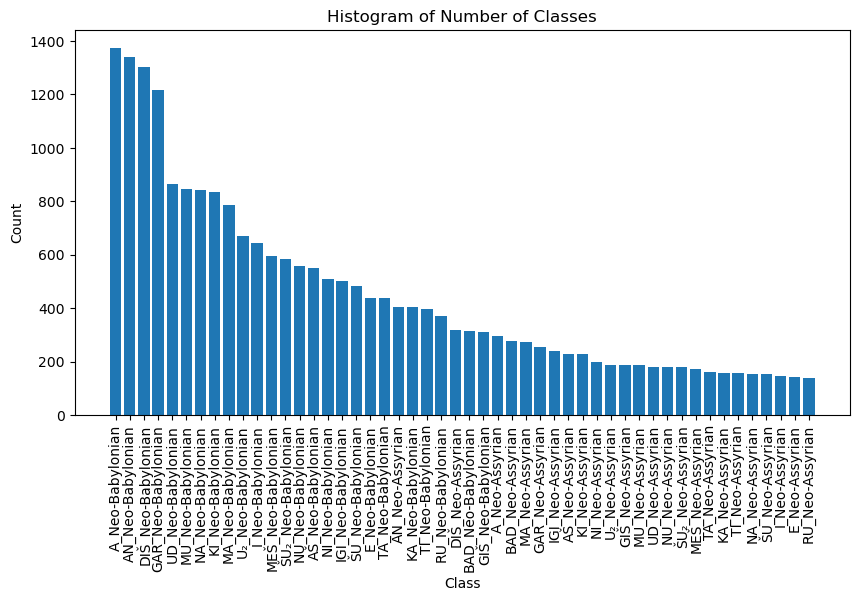

In [25]:
plt.figure(figsize=(10,5))
plt.bar(sorted_labels_count.keys(), sorted_labels_count.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Number of Classes')
plt.xticks(rotation=90)
plt.show()